# Part 2: Disciplinary Policy National Analysis

## All necessary imports

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Read in data

In [45]:
data_path = 'data/'
df = pd.read_csv(data_path + 'historic_policy_data.csv')
df

,% Suspension,% Year Removal,% Transfer,% security staff,% law enforcement with firearm,% metal detectors,% security cameras,% locked doors,% locker checks,% schools violent incident,Violent crime per 1000,Minority 0-25% security staff,Minority 25-50% security staff,Minority 50-75% security staff,Minority 75-100% security staff,Minority 0-25% law enforcement with firearm,Minority 25-50% law enforcement with firearm,Minority 50-75% law enforcement with firearm,Minority 75-100% law enforcement with firearm
0,71.74824,4.31997,23.93179,56.51682,42.92637,12.34831,82.51670,78.18020,52.88099,68.93775,17.53865,51.14082,51.56285,62.90582,64.51964,45.55993,43.32143,47.28651,35.84235
1,72.57346,5.12254,22.30400,61.44897,46.66295,10.36333,83.76312,78.80968,47.81693,70.68440,19.57669,58.33032,59.24733,61.51576,67.42589,52.49729,47.35510,48.12068,37.39100
2,68.41928,4.86017,26.72055,65.00293,51.39813,11.87798,86.00919,84.58194,46.70004,70.19048,19.20800,64.44340,62.32250,65.35529,67.63201,57.14742,54.63931,49.56159,42.82308


In [52]:
predictors = ["% Suspension", "% Year Removal", "% Transfer", "% security staff", "% law enforcement with firearm", \
        "% metal detectors", "% security cameras", "% locked doors", "% locker checks"]
responses = ["% schools violent incident", "Violent crime per 1000"]

linreg_model = LinearRegression()
for response in responses:
    for column in predictors:
        X_train, X_test, y_train, y_test = train_test_split(df[[column]], df[[response]], random_state=0)
        model_fit = linreg_model.fit(X_train, y_train)
        X_test = sm.add_constant(X_test)
        results = sm.OLS(y_test, X_test).fit()
        print("\nPredictor:", column, " Response:" + response + "\n", results.summary())

ValueError: resids must contain at least 2 elements

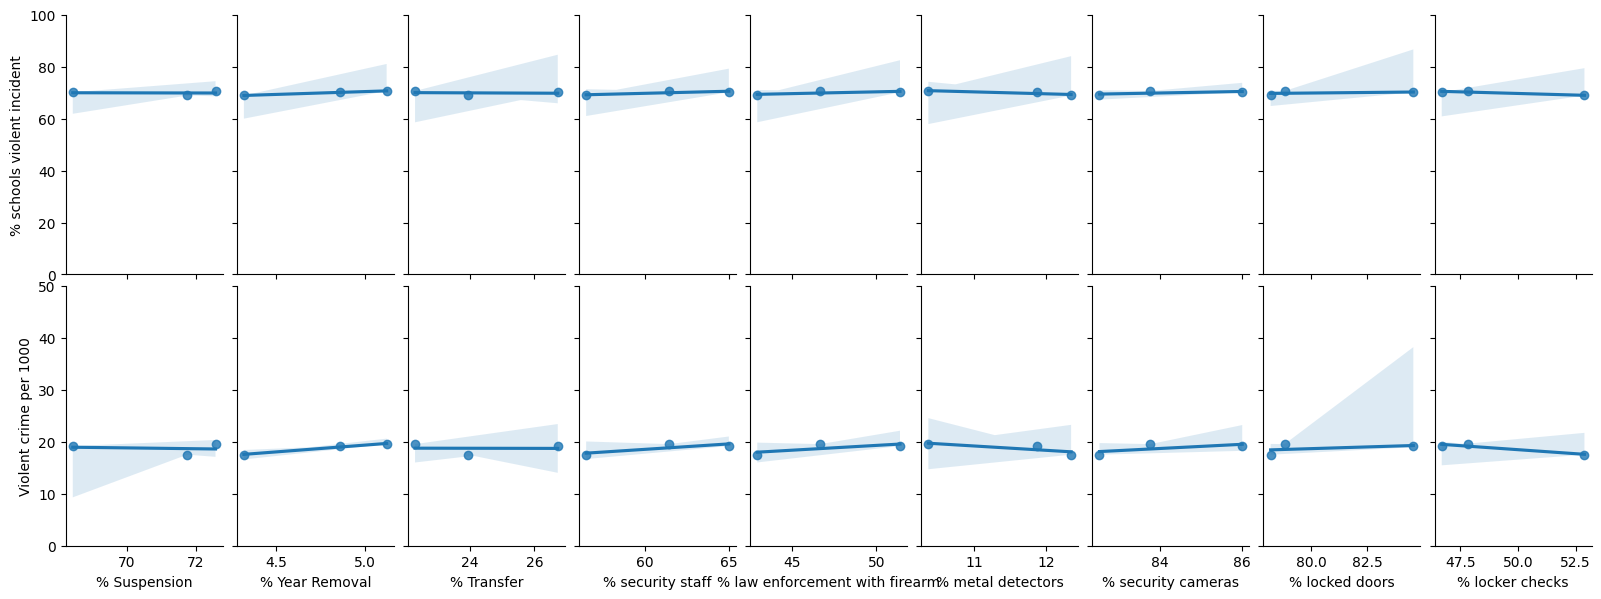

In [50]:
g = sns.pairplot(df, x_vars=predictors, y_vars=responses, kind='reg', height=3, aspect=0.6)
axis_bounds = {"% schools violent incident" : [0, 100], "Violent crime per 1000" : [0, 50]}

for ax in g.axes.flatten():
    ylab = ax.get_ylabel()
    if len(ylab) == 0: 
        continue
    ax.set_ylim(axis_bounds[ylab])

In [ ]:
sns.catplot(
    data=df, x='target', y='value',
    col='variable', kind='box', col_wrap=2
)

<AxesSubplot: xlabel='% Suspension', ylabel='% schools violent incident'>

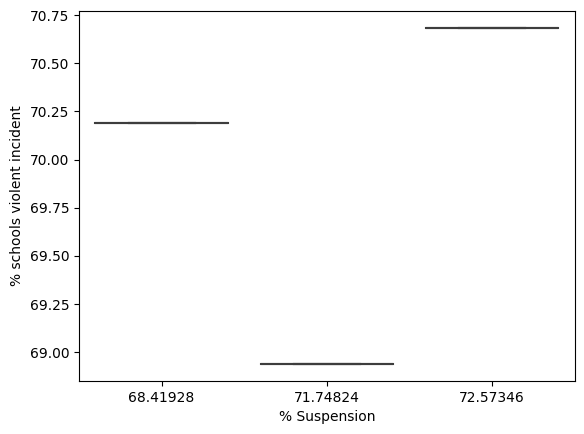

In [53]:
sns.boxplot(data=df, x="% Suspension", y="% schools violent incident")

<AxesSubplot: xlabel='% Year Removal', ylabel='% schools violent incident'>

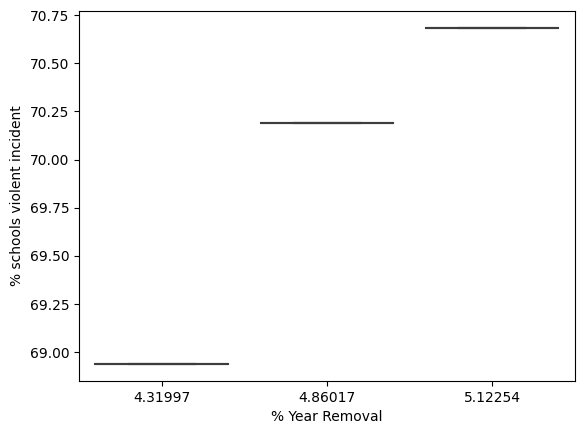

In [54]:
sns.boxplot(data=df, x="% Year Removal", y="% schools violent incident")

In [37]:
linreg_model = LinearRegression()

response_data = df[responses]
preds_data = df[predictors]
X_train, X_test, y_train, y_test = train_test_split(preds_data, response_data, random_state=0)
model_fit = linreg_model.fit(X_train, y_train)
X_test = sm.add_constant(X_test)
results = sm.OLS(y_test, X_test).fit()
print("\nMultiple Regression Model\n", results.summary())

multiple_regression_score = mean_squared_error(y_train, model_fit.predict(X_train))
print(multiple_regression_score)

C:\Python39\lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
C:\Python39\lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
C:\Python39\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 1 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)